In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import time
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
data_tmp = pd.read_csv('D:\stock_papper\stock_label.csv', index_col = 'Date')
data_tmp.index = pd.to_datetime(data_tw.index, format = '%Y/%m/%d')

In [2]:
target_vix = '%5EVIX'
start = dt.datetime(2005, 1, 1)
end = dt.date(2021, 11, 1)
data_vix = web.DataReader(target_vix, 'yahoo', start, end)
data_vix['log_return'] = (np.log(data_vix.Close.values) - np.log(data_vix.Close.shift(1).values))

In [11]:
data_tw = pd.read_csv('D:\stock_papper\stock_label.csv', index_col = 'Date')
data_tw.index = pd.to_datetime(data_tw.index, format = '%Y/%m/%d')
data_tw['return'] = (data_tw['Adj Close'].values - data_tw['Adj Close'].shift(1).values)/ data_tw['Adj Close'].shift(1).values
data_tw = data_tw.iloc[-1500:]
data_tw.describe()

,Adj Close,label,return
count,1500.000000,1500.000000,1500.000000
mean,11340.068303,0.001333,0.000536
std,2605.808680,0.209827,0.009498
min,7663.980957,-1.000000,-0.063125
25%,9718.565918,0.000000,-0.003984
50%,10708.090330,0.000000,0.000792
75%,11807.779787,0.000000,0.005702
max,18034.189450,1.000000,0.063671


In [4]:
data_merge = pd.merge(data_tw.iloc[:, [1, 4, 5]], data_vix.iloc[:, [5, 6]], how = 'inner', left_index = True, right_index = True)
data_merge = data_merge.dropna()

for i in range(data_merge.shape[0]):
    if (data_merge.iloc[i, 0]) == -1:
        data_merge.iloc[i, 0] = 1

mask = data_merge['label'] == 1
data_breakpoint = data_merge[mask]

In [5]:
data_normal = data_merge.iloc[-600: -400, :]

In [6]:
data_train = pd.concat([data_breakpoint, data_normal], axis = 0)
x_train, y_train = data_train.iloc[:, [1, 2, 4]], data_train.iloc[:, 0]
clf = svm.SVC()
scores = cross_val_score(clf, x_train, y_train, cv = 5).mean()
print(scores)

0.6421258657031015


In [7]:
wti_oil_data = pd.read_csv('D:\stock_papper\wti_oil_data.csv')
wti_oil_data = wti_oil_data.rename(columns = {'日期': 'Date', '收市': 'Close', '開市': 'Open', '高': 'High', '低': 'Low', '成交量': 'Volume', '更改%': 'Percentage change'})
wti_oil_data = wti_oil_data.set_index('Date')
wti_oil_data.index = pd.to_datetime(wti_oil_data.index, format = '%Y年%m月%d日')
wti_oil_data = wti_oil_data.iloc[::-1, :]
wti_oil_data = wti_oil_data.drop(columns = ['Volume', 'Percentage change'])
wti_oil_data['daily_return'] = (wti_oil_data.Close - wti_oil_data.Close.shift(1))/ wti_oil_data.Close.shift(1)
wti_oil_data['log_return'] = np.log(wti_oil_data.Close.values) - np.log(wti_oil_data.Close.shift(1).values)
wti_oil_data['max_min'] = (wti_oil_data.Close - wti_oil_data.Close.min())/ (wti_oil_data.Close.max() - wti_oil_data.Close.min())
wti_oil_data['high_low'] = (wti_oil_data.High - wti_oil_data.Low)/ wti_oil_data.Low
wti_oil_data = wti_oil_data.dropna()
wti_oil_data.head()

,Close,Open,High,Low,daily_return,log_return,max_min,high_low
Date,,,,,,,,
2006-01-04,63.42,63.00,63.65,62.26,0.004435,0.004425,0.312479,0.022326
2006-01-05,62.79,63.40,63.74,62.60,-0.009934,-0.009983,0.307188,0.018211
2006-01-06,64.21,62.60,64.45,62.60,0.022615,0.022363,0.319113,0.029553
2006-01-09,63.50,64.15,64.61,62.90,-0.011057,-0.011119,0.313151,0.027186
2006-01-10,63.37,63.38,64.20,63.05,-0.002047,-0.002049,0.312059,0.018239


In [8]:
gold_data = pd.read_csv("D:\stock_papper\gold_data.csv")
gold_data = gold_data.rename(columns = {'日期': 'Date', '收市': 'Close', '開市': 'Open', '高': 'High', '低': 'Low', '成交量': 'Volume', '更改%': 'Percentage change'})
gold_data = gold_data.set_index('Date')
gold_data.index = pd.to_datetime(gold_data.index, format = '%Y/%m/%d')
gold_data = gold_data.iloc[::-1, :]
gold_data = gold_data.drop(columns = ['Volume', 'Percentage change'])
change = ['Close', 'Open', 'High', 'Low']
for i in change:
    gold_data[i] = gold_data[i].str.replace(',', '').astype(float)
gold_data['daily_return'] = (gold_data.Close - gold_data.Close.shift(1))/ gold_data.Close.shift(1)
gold_data['log_return'] = np.log(gold_data.Close.values) - np.log(gold_data.Close.shift(1).values)
gold_data['max_min'] = (gold_data.Close - gold_data.Close.min())/ (gold_data.Close.max() - gold_data.Close.min())
gold_data['high_low'] = (gold_data.High - gold_data.Low)/ gold_data.Low
gold_data = gold_data.dropna()
gold_data.head()

,Close,Open,High,Low,daily_return,log_return,max_min,high_low
Date,,,,,,,,
2006-01-03,530.7,518.6,528.5,518.6,0.023332,0.023064,0.007579,0.019090
2006-01-04,533.9,533.6,533.6,533.5,0.006030,0.006012,0.009583,0.000187
2006-01-05,526.3,529.0,529.0,526.0,-0.014235,-0.014337,0.004823,0.005703
2006-01-06,539.7,539.7,539.7,539.7,0.025461,0.025142,0.013216,0.000000
2006-01-09,549.1,549.1,549.1,549.1,0.017417,0.017267,0.019103,0.000000


In [9]:
usd_bond = pd.read_csv('D:/stock_papper/10y_usd_bond_data.csv')
usd_bond = usd_bond.rename(columns = {'日期': 'Date', '收市': 'Close', '開市': 'Open', '高': 'High', '低': 'Low', '成交量': 'Volume', '更改%': 'Percentage change'})
usd_bond = usd_bond.set_index('Date')
usd_bond.index = pd.to_datetime(usd_bond.index, format = '%Y年%m月%d日')
usd_bond = usd_bond.iloc[::-1, :]
usd_bond = usd_bond.drop(columns = ['Volume', 'Percentage change'])
usd_bond['daily_return'] = (usd_bond.Close - usd_bond.Close.shift(1))/ usd_bond.Close.shift(1)
usd_bond['log_return'] = np.log(usd_bond.Close.values) - np.log(usd_bond.Close.shift(1).values)
usd_bond['max_min'] = (usd_bond.Close - usd_bond.Close.min())/ (usd_bond.Close.max() - usd_bond.Close.min())
usd_bond['high_low'] = (usd_bond.High - usd_bond.Low)/ usd_bond.Low
usd_bond = usd_bond.dropna()
usd_bond.head()

,Close,Open,High,Low,daily_return,log_return,max_min,high_low
Date,,,,,,,,
2006-01-04,109.78,109.70,109.89,109.47,0.001094,0.001094,0.157241,0.003837
2006-01-05,109.78,109.81,109.91,109.59,0.000000,0.000000,0.157241,0.002920
2006-01-06,109.59,109.77,110.16,109.50,-0.001731,-0.001732,0.152000,0.006027
2006-01-09,109.59,109.56,109.70,109.48,0.000000,0.000000,0.152000,0.002009
2006-01-10,109.23,109.64,109.67,109.19,-0.003285,-0.003290,0.142069,0.004396


In [10]:
data_other_index = pd.merge(gold_data.iloc[:, 5], wti_oil_data.iloc[:, 5], how = 'inner', left_index = True, right_index = True)
data_other_index = pd.merge(data_other_index, usd_bond.iloc[:, 5], how = 'inner', left_index = True, right_index = True)
data_train = pd.merge(data_train, data_other_index, how = 'inner', left_index = True, right_index = True)
data_train = data_train.rename(columns = {'log_return_x_x': 'index_log_return', 'log_return_y_x': 'vix_log_return', 'log_return_x_y': 'gold_log_return', 'log_return_y_y': 'oil_log_return', 'log_return': 'bond_log_return'})
data_train.head()

,label,index_log_return,5-10ma,Adj Close,vix_log_return,gold_log_return,oil_log_return,bond_log_return
Date,,,,,,,,
2006-01-17,1,-0.001956,26.478447,11.91,0.058790,-0.004867,0.036708,0.000820
2006-01-23,1,-0.016266,-59.143092,13.93,-0.044233,0.008635,-0.003664,0.000365
2006-03-23,1,-0.004180,-35.400385,11.17,-0.003575,-0.001453,0.034058,-0.003545
2006-05-08,1,0.013960,97.117716,12.00,0.032179,-0.006471,-0.006002,-0.000760
2006-06-21,1,-0.010102,-64.697661,15.52,-0.072680,0.018207,0.019962,0.000477


In [11]:
x_train, y_train = data_train.iloc[:, [1, 2, 4, 5, 6, 7]].values, data_train.iloc[:, 0].values
clf = svm.SVC()
clf.fit(x_train, y_train)
scores = cross_val_score(clf, x_train, y_train, cv = 5).mean()
print(scores)

0.65


In [12]:
sgd_clf = SGDClassifier(loss="hinge", penalty="l1", max_iter=20)
tree_clf = tree.DecisionTreeClassifier()
clf_random = RandomForestClassifier(n_estimators=400)
xgbc = XGBClassifier()
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors= 10)

model = [sgd_clf, tree_clf, clf_random, gnb, knn]

for i in range(0, 5):
    scores = cross_val_score(model[i], x_train, y_train, cv = 5).mean()
    print(f'{i} : {scores}')

0 : 0.61
1 : 0.5900000000000001


c:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


2 : 0.675
3 : 0.625
4 : 0.6275


In [13]:
clf_random.fit(x_train, y_train)

RandomForestClassifier(n_estimators=400)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(x_train)
print(pca.explained_variance_ratio_)

[9.99998836e-01 1.03866904e-06 8.80511466e-08 1.88610837e-08
 1.68978301e-08 1.30950269e-09]


In [15]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators = 400)
scores = cross_val_score(ada_clf, x_train, y_train, cv = 5).mean()
print(scores)

0.6299999999999999


Paper strategy 實作
MACD(快) = EMA(1) - EMA(25)
MACD(慢) = EMA(5) - EMA(75)
signal = EMA(5) - EMA(25)

normal strategy(t+1)
buy if (MACD > signal)
sell if (MACD < signal)

paper strategy(t+1)
buy if (EMA快 > EMA 慢 && EMA快 > EMA(signal))
sell if (EMA快 < EMA 慢 && EMA快 < EMA(signal))

paper compare parameters
(3, 11, 6)
(9, 19, 6)
(3, 28, 9)

profit factor
PF = |Profits/Losses|
maximum drawdown => worst decline from peak
Net Profit = profit - losses


In [16]:
data_paper = data_tw.drop(columns = ['5ma', '10ma', 'log_return', '5-10ma'], axis = 0)
data_paper.head()

,Adj Close,label
Date,,
2005-01-03,6143.097656,0
2005-01-04,6060.437500,0
2005-01-05,5988.347656,0
2005-01-06,5982.098145,0
2005-01-07,5935.968262,0


In [17]:
data_paper['3ma'] = data_paper['Adj Close'].ewm(span = 3).mean()
data_paper['6ma'] = data_paper['Adj Close'].ewm(span = 6).mean()
data_paper['9ma'] = data_paper['Adj Close'].ewm(span = 9).mean()
data_paper['11ma'] = data_paper['Adj Close'].ewm(span = 11).mean()
data_paper['19ma'] = data_paper['Adj Close'].ewm(span = 19).mean()
data_paper['28ma'] = data_paper['Adj Close'].ewm(span = 28).mean()
data_paper['3-11MACD'] = data_paper['3ma'] - data_paper['11ma']
data_paper['6-19MACD'] = data_paper['6ma'] - data_paper['19ma']
data_paper['3-28MACD'] = data_paper['3ma'] - data_paper['28ma']
data_paper['signal_6_3_11'] = data_paper['3-11MACD'].ewm(span = 6).mean()
data_paper['signal_9_6_19'] = data_paper['6-19MACD'].ewm(span = 9).mean()
data_paper['signal_9_3_28'] = data_paper['3-28MACD'].ewm(span = 9).mean()
data_paper.head()

,Adj Close,label,3ma,6ma,9ma,11ma,19ma,28ma,3-11MACD,6-19MACD,3-28MACD,signal_6_3_11,signal_9_6_19,signal_9_3_28
Date,,,,,,,,,,,,,,
2005-01-03,6143.097656,0,6143.097656,6143.097656,6143.097656,6143.097656,6143.097656,6143.097656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-04,6060.437500,0,6087.990885,6094.879232,6097.175347,6098.010298,6099.592311,6100.291504,-10.019413,-4.713079,-12.300618,-5.844657,-2.618377,-6.833677
2005-01-05,5988.347656,0,6031.051897,6046.988890,6052.573834,6054.627275,6058.542623,6060.280974,-23.575378,-11.553732,-29.229077,-13.815348,-6.280408,-16.012120
2005-01-06,5982.098145,0,6004.943229,6021.924109,6028.699956,6031.279597,6036.313929,6038.593065,-26.336367,-14.389820,-33.649835,-18.651733,-9.027499,-21.986956
2005-01-07,5935.968262,0,5969.343246,5991.756007,6001.114373,6004.721117,6011.810091,6015.035219,-35.377871,-20.054084,-45.691973,-24.522140,-12.307659,-29.038662


In [18]:
data_paper_process = data_paper.iloc[30:, [0, 8, 9, 10, 11, 12, 13]]
data_paper_process.head()

,Adj Close,3-11MACD,6-19MACD,3-28MACD,signal_6_3_11,signal_9_6_19,signal_9_3_28
Date,,,,,,,
2005-02-22,6107.147461,47.940148,73.233665,106.519486,62.391303,61.807498,98.723821
2005-02-23,6121.497559,41.905962,69.056413,100.859309,56.538225,63.258431,99.151257
2005-02-24,6128.317383,38.164947,65.613465,97.327365,51.288638,63.729736,98.786247
2005-02-25,6207.806641,59.891146,76.034876,125.778026,53.746524,66.192013,104.187342
2005-03-01,6259.666016,81.216538,90.018360,156.289271,61.595159,70.959216,114.611956


In [19]:
#buy = 1, sale = -1
data_paper_process['3_6_11_strategy'] = 0
data_paper_process['6_9_19_strategy'] = 0
data_paper_process['3_9_28_strategy'] = 0
for i in range(data_paper_process.shape[0]):
    if data_paper_process.iloc[i, 1] > data_paper_process.iloc[i, 4]:
        data_paper_process.iloc[i, 7] = 1
    elif data_paper_process.iloc[i, 1] < data_paper_process.iloc[i, 4]:
        data_paper_process.iloc[i, 7] = -1
    else :
        data_paper_process.iloc[i, 7] = 0
        
    if data_paper_process.iloc[i, 2] > data_paper_process.iloc[i, 5]:
        data_paper_process.iloc[i, 8] = 1
    elif data_paper_process.iloc[i, 2] < data_paper_process.iloc[i, 5]:
        data_paper_process.iloc[i, 8] = -1
    else :
        data_paper_process.iloc[i, 8] = 0
        
    if data_paper_process.iloc[i, 3] > data_paper_process.iloc[i, 6]:
        data_paper_process.iloc[i, 9] = 1
    elif data_paper_process.iloc[i, 3] < data_paper_process.iloc[i, 6]:
        data_paper_process.iloc[i, 9] = -1
    else :
        data_paper_process.iloc[i, 9] = 0

data_paper_process.head()

,Adj Close,3-11MACD,6-19MACD,3-28MACD,signal_6_3_11,signal_9_6_19,signal_9_3_28,3_6_11_strategy,6_9_19_strategy,3_9_28_strategy
Date,,,,,,,,,,
2005-02-22,6107.147461,47.940148,73.233665,106.519486,62.391303,61.807498,98.723821,-1,1,1
2005-02-23,6121.497559,41.905962,69.056413,100.859309,56.538225,63.258431,99.151257,-1,1,1
2005-02-24,6128.317383,38.164947,65.613465,97.327365,51.288638,63.729736,98.786247,-1,1,-1
2005-02-25,6207.806641,59.891146,76.034876,125.778026,53.746524,66.192013,104.187342,1,1,1
2005-03-01,6259.666016,81.216538,90.018360,156.289271,61.595159,70.959216,114.611956,1,1,1


In [20]:
print(data_paper_process['3_6_11_strategy'].value_counts())
print(data_paper_process['6_9_19_strategy'].value_counts())
print(data_paper_process['3_9_28_strategy'].value_counts())

 1    2065
-1    2053
Name: 3_6_11_strategy, dtype: int64
 1    2084
-1    2034
Name: 6_9_19_strategy, dtype: int64
 1    2130
-1    1988
Name: 3_9_28_strategy, dtype: int64


In [21]:
count = 0
while count < data_paper_process.shape[0]:
    tmp = data_paper_process.iloc[count, 7];
    for i in range(count + 1, data_paper_process.shape[0], 1):
        if tmp == data_paper_process.iloc[i, 7]:
            data_paper_process.iloc[i, 7] = 0
        else :
            count = i - 1
            break
    count += 1

count = 0
while count < data_paper_process.shape[0]:
    tmp = data_paper_process.iloc[count, 8];
    for i in range(count + 1, data_paper_process.shape[0], 1):
        if tmp == data_paper_process.iloc[i, 8]:
            data_paper_process.iloc[i, 8] = 0
        else :
            count = i - 1
            break
    count += 1
    
count = 0
while count < data_paper_process.shape[0]:
    tmp = data_paper_process.iloc[count, 9];
    for i in range(count + 1, data_paper_process.shape[0], 1):
        if tmp == data_paper_process.iloc[i, 9]:
            data_paper_process.iloc[i, 9] = 0
        else :
            count = i - 1
            break
    count += 1
    
data_paper_process.head()

,Adj Close,3-11MACD,6-19MACD,3-28MACD,signal_6_3_11,signal_9_6_19,signal_9_3_28,3_6_11_strategy,6_9_19_strategy,3_9_28_strategy
Date,,,,,,,,,,
2005-02-22,6107.147461,47.940148,73.233665,106.519486,62.391303,61.807498,98.723821,-1,1,1
2005-02-23,6121.497559,41.905962,69.056413,100.859309,56.538225,63.258431,99.151257,0,0,0
2005-02-24,6128.317383,38.164947,65.613465,97.327365,51.288638,63.729736,98.786247,0,0,-1
2005-02-25,6207.806641,59.891146,76.034876,125.778026,53.746524,66.192013,104.187342,1,0,1
2005-03-01,6259.666016,81.216538,90.018360,156.289271,61.595159,70.959216,114.611956,0,0,0


In [22]:
print(data_paper_process['3_6_11_strategy'].value_counts())
print(data_paper_process['6_9_19_strategy'].value_counts())
print(data_paper_process['3_9_28_strategy'].value_counts())

 0    3347
-1     386
 1     385
Name: 3_6_11_strategy, dtype: int64
 0    3658
 1     230
-1     230
Name: 6_9_19_strategy, dtype: int64
 0    3532
 1     293
-1     293
Name: 3_9_28_strategy, dtype: int64


In [23]:
red_mask_up = data_paper_process['3_6_11_strategy'] == 1
blue_mask_down = data_paper_process['3_6_11_strategy'] == -1
black_mask_same = data_paper_process['3_6_11_strategy'] == 0

In [24]:
data_2020 = data_paper_process.iloc[-465:, :]
up_2020 = data_paper_process['3_6_11_strategy'] == 1
down_2020 = data_paper_process['3_6_11_strategy'] == -1
up = (data_2020[up_2020])['Adj Close']
down = (data_2020[down_2020])['Adj Close']

C:\Users\LEGION~1\AppData\Local\Temp/ipykernel_3944/1249449034.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  up = (data_2020[up_2020])['Adj Close']
C:\Users\LEGION~1\AppData\Local\Temp/ipykernel_3944/1249449034.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  down = (data_2020[down_2020])['Adj Close']


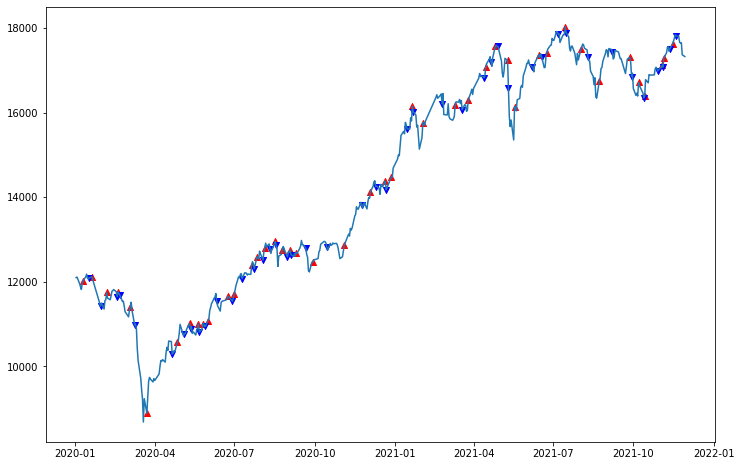

In [25]:
plt.figure(figsize = (12, 8))
plt.plot(data_2020['Adj Close'])
plt.scatter(x = up.index, y = np.array(up), marker = '^', color = 'red')
plt.scatter(x = down.index, y = np.array(down), marker = 'v', color = 'blue')

In [26]:
data_2020_merge = pd.merge(data_merge, data_other_index, how = 'inner', left_index = True, right_index = True)
data_2020_predict = pd.merge(data_2020, data_2020_merge, how = 'inner', left_index = True, right_index = True)
data_2020_predict.head()

,Adj Close_x,3-11MACD,6-19MACD,3-28MACD,signal_6_3_11,signal_9_6_19,signal_9_3_28,3_6_11_strategy,6_9_19_strategy,3_9_28_strategy,label,log_return_x_x,5-10ma,Adj Close_y,log_return_y_x,log_return_x_y,log_return_y_y,log_return
Date,,,,,,,,,,,,,,,,,,
2020-01-02,12100.48047,55.757063,111.570473,211.264468,62.688324,129.010338,231.751301,0,0,0,0,0.008577,34.595060,12.47,-0.099892,0.033077,-0.140708,0.002647
2020-01-03,12110.42969,62.615238,112.812219,217.579442,62.667442,125.770714,228.916929,0,0,0,0,0.000822,37.551557,14.02,0.117159,0.015339,0.003560,0.005891
2020-01-06,11953.36035,7.898427,81.217257,145.314131,47.019152,116.860023,212.196369,0,0,0,0,-0.013055,13.089955,13.85,-0.012200,0.010531,0.002615,-0.001083
2020-01-07,11880.32031,-39.905126,45.021139,75.179775,22.183644,102.492246,184.793050,0,0,0,0,-0.006129,-12.112740,13.79,-0.004342,0.003342,0.003910,-0.000697
2020-01-08,11817.09961,-77.571412,8.724900,12.688315,-6.317801,83.738777,150.372103,0,0,0,0,-0.005336,-34.704453,13.45,-0.024965,-0.009248,-0.026166,-0.003024


In [27]:
x_2020_train = data_2020_predict.iloc[:, [11, 12, 14, 15, 16, 17]].values
y_2020_train = clf.predict(x_2020_train)
y_2020_train.shape

(433,)

In [28]:
y_2020_train

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [29]:
data_2020_predict['3_6_11_strategy'].value_counts()

 0    352
-1     41
 1     40
Name: 3_6_11_strategy, dtype: int64

In [30]:
data_2020_predict['predict_label'] = y_2020_train
up_predict = (data_2020_predict['3_6_11_strategy'] == 1) & (data_2020_predict['predict_label'] == 0)
down_predict = (data_2020_predict['3_6_11_strategy'] == -1) & (data_2020_predict['predict_label'] == 0)
up_2020_predict = data_2020_predict[up_predict]['Adj Close_x']
down_2020_predict = data_2020_predict[down_predict]['Adj Close_x']

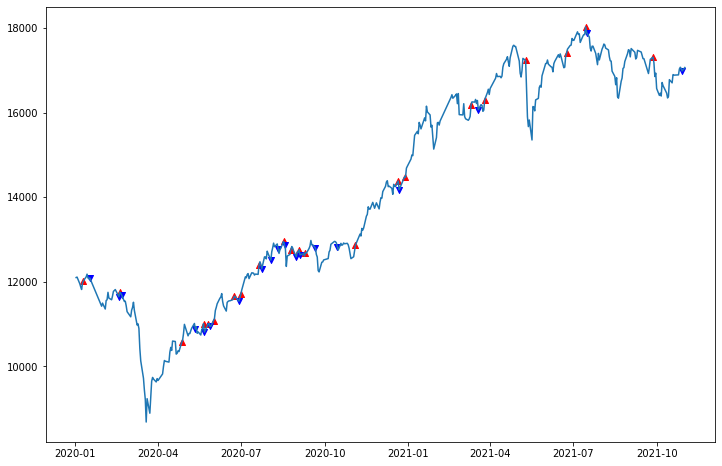

In [31]:
plt.figure(figsize = (12, 8))
plt.plot(data_2020_predict['Adj Close_x'])
plt.scatter(x = up_2020_predict.index, y = np.array(up_2020_predict), marker = '^', color = 'red')
plt.scatter(x = down_2020_predict.index, y = np.array(down_2020_predict), marker = 'v', color = 'blue')